# Project 4: Regression Analysis

*Lumi Huang, Christian Warloe, Ke Zhao, Landi Luo*

---


## Introduction

## Dataset 1: Network Backup Dataset

In [0]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [0]:
#import data
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#upload the dataset into the google drive
network = pd.read_csv('gdrive/My Drive/network_backup_dataset.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#can also import from local
#network = pd.read_csv('./network_backup_dataset.csv')

In [0]:
network.shape
network.head(3)

,Week #,Day of Week,Backup Start Time - Hour of Day,Work-Flow-ID,File Name,Size of Backup (GB),Backup Time (hour)
0,1,Monday,1,work_flow_0,File_0,0.0,0
1,1,Monday,1,work_flow_2,File_12,0.0,0
2,1,Monday,1,work_flow_2,File_13,0.0,0


In [0]:
network.columns

Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name', 'Size of Backup (GB)',
       'Backup Time (hour)'],
      dtype='object')

### Load the Dataset

**(a) For the first twenty-day period (x-axis unit is day number) plot the backup sizes for all workflows (color coded on the y-axis).**

In [0]:
import matplotlib.pyplot as plt

In [0]:
network['Work-Flow-ID'].unique()

array(['work_flow_0', 'work_flow_2', 'work_flow_3', 'work_flow_1',
       'work_flow_4'], dtype=object)

In [0]:
#convert day of week to number
day_numeric = {
    'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4,
    'Friday':5, 'Saturday':6, 'Sunday':7
}
network['Day'] = network['Day of Week'].apply(lambda x: day_numeric[x])

In [0]:
network = network.assign(Day=(network['Week #'] - 1)* 7 + network['Day'])

In [0]:
backup_sizes20 = network[network['Day'] <= 20].groupby(['Work-Flow-ID', 'Day']).sum().reset_index()

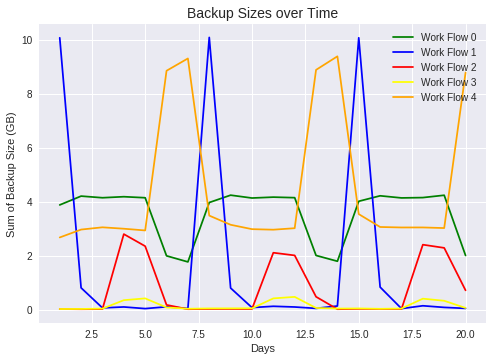

In [0]:
plt.plot(backup_sizes20[backup_sizes20['Work-Flow-ID'] == 'work_flow_0']['Day'], 
         backup_sizes20[backup_sizes20['Work-Flow-ID'] == 'work_flow_0']['Size of Backup (GB)'],'green')
plt.plot(backup_sizes20[backup_sizes20['Work-Flow-ID'] == 'work_flow_1']['Day'], 
         backup_sizes20[backup_sizes20['Work-Flow-ID'] == 'work_flow_1']['Size of Backup (GB)'],'blue')
plt.plot(backup_sizes20[backup_sizes20['Work-Flow-ID'] == 'work_flow_2']['Day'], 
         backup_sizes20[backup_sizes20['Work-Flow-ID'] == 'work_flow_2']['Size of Backup (GB)'],'red')
plt.plot(backup_sizes20[backup_sizes20['Work-Flow-ID'] == 'work_flow_3']['Day'], 
         backup_sizes20[backup_sizes20['Work-Flow-ID'] == 'work_flow_3']['Size of Backup (GB)'],'yellow')
plt.plot(backup_sizes20[backup_sizes20['Work-Flow-ID'] == 'work_flow_4']['Day'], 
         backup_sizes20[backup_sizes20['Work-Flow-ID'] == 'work_flow_4']['Size of Backup (GB)'],'orange')
plt.legend(loc = 'upper right', labels= ('Work Flow 0', 'Work Flow 1', 'Work Flow 2', 'Work Flow 3', 'Work Flow 4'))
plt.xlabel('Days')
plt.ylabel('Sum of Backup Size (GB)')
plt.title('Backup Sizes over Time', fontsize = 14)
plt.show()


**(b) Do the same plot for the first 105-day period.**

In [0]:
backup_sizes105 = network[network['Day'] <= 105].groupby(['Work-Flow-ID', 'Day']).sum().reset_index()

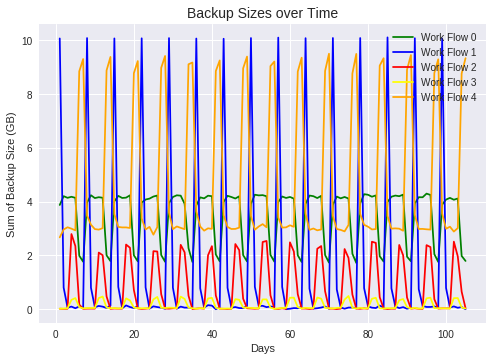

In [0]:
plt.plot(backup_sizes105[backup_sizes105['Work-Flow-ID'] == 'work_flow_0']['Day'], 
         backup_sizes105[backup_sizes105['Work-Flow-ID'] == 'work_flow_0']['Size of Backup (GB)'],'green')
plt.plot(backup_sizes105[backup_sizes105['Work-Flow-ID'] == 'work_flow_1']['Day'], 
         backup_sizes105[backup_sizes105['Work-Flow-ID'] == 'work_flow_1']['Size of Backup (GB)'],'blue')
plt.plot(backup_sizes105[backup_sizes105['Work-Flow-ID'] == 'work_flow_2']['Day'], 
         backup_sizes105[backup_sizes105['Work-Flow-ID'] == 'work_flow_2']['Size of Backup (GB)'],'red')
plt.plot(backup_sizes105[backup_sizes105['Work-Flow-ID'] == 'work_flow_3']['Day'], 
         backup_sizes105[backup_sizes105['Work-Flow-ID'] == 'work_flow_3']['Size of Backup (GB)'],'yellow')
plt.plot(backup_sizes105[backup_sizes105['Work-Flow-ID'] == 'work_flow_4']['Day'], 
         backup_sizes105[backup_sizes105['Work-Flow-ID'] == 'work_flow_4']['Size of Backup (GB)'],'orange')
plt.legend(loc = 'upper right', labels= ('Work Flow 0', 'Work Flow 1', 'Work Flow 2', 'Work Flow 3', 'Work Flow 4'))
plt.xlabel('Days')
plt.ylabel('Sum of Backup Size (GB)')
plt.title('Backup Sizes over Time', fontsize =14)
plt.show()


**(c) Can you identify any repeating patterns?**

### Prediction

For part (a)-(e), in each part you will use one type of models to predict the backup sizes. In each part, you need to report **training and test Root Mean Squared Error (RMSE) from 10-fold cross validation** as the basic evaluation of the performance. That is, for each fold you get two numbers: training RMSE and test RMSE.  In addition, you need to **plot the following two types of plots** using the whole dataset for **each part** with the best parameters and hyper-parameters found for the model (use RMSE as the standard for the selection of the best).  


*   Plot fitted values against true values as scatter plots
*   Plot residuals versus fitted values as scatter plots

These plots visualize how well your models fit the data.




#### **(a) Fit a linear regression model. We use ordinary least square as the penalty function. $\min_\beta\|Y - X\beta\|^2 $  where the minimization is on the coefficient vector β.**  

**Convert each categorical feature into one dimensional numerical values using
scalar encoding (e.g. Monday to Sunday can be mapped to 1-7), and then directly use them to fit a basic linear regression model.**

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn import linear_model

In [0]:
#import from google drive
import pandas as pd
nwbu = pd.read_csv('gdrive/My Drive/network_backup_dataset.csv')
nwbu.columns

Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name', 'Size of Backup (GB)',
       'Backup Time (hour)'],
      dtype='object')

In [0]:
#import from local
#nwbu = pd.read_csv('/Users/lumi/Documents/UCLA/Grad/19 WINTER/ee 219/Projects/network_backup_dataset.csv')

In [0]:
#outcome = backup time
y = nwbu['Size of Backup (GB)']

In [0]:
X = nwbu.drop(['Backup Time (hour)', 'Size of Backup (GB)'], axis=1)

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18588 entries, 0 to 18587
Data columns (total 5 columns):
Week #                             18588 non-null int64
Day of Week                        18588 non-null object
Backup Start Time - Hour of Day    18588 non-null int64
Work-Flow-ID                       18588 non-null object
File Name                          18588 non-null object
dtypes: int64(2), object(3)
memory usage: 726.2+ KB


In [0]:
X_scaler = X.copy()

In [0]:
#scaler encoding
#categorical: Day of the Week, Hour of the Day, Work-Flow-ID, File Name, Week Number -> convert it into a one dimensional numerical value
#Day of the Week variable could take values 1, · · · , 7 corresponding to Monday through Sunday. 
#Hour of the Day could be encoded as 1, · · · , 24.

#day of the week
day_numeric = {
    'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4,
    'Friday':5, 'Saturday':6, 'Sunday':7
}
X_scaler['Day of Week'] = X_scaler['Day of Week'].apply(lambda x: day_numeric[x])

In [0]:
print(X_scaler['Backup Start Time - Hour of Day'].unique())
print(X_scaler['Work-Flow-ID'].unique())
print(X_scaler['File Name'].unique())
print(X_scaler['Week #'].unique())

[ 1  5  9 13 17 21]
['work_flow_0' 'work_flow_2' 'work_flow_3' 'work_flow_1' 'work_flow_4']
['File_0' 'File_12' 'File_13' 'File_14' 'File_16' 'File_17' 'File_18'
 'File_19' 'File_20' 'File_21' 'File_22' 'File_23' 'File_1' 'File_2'
 'File_3' 'File_4' 'File_5' 'File_6' 'File_7' 'File_8' 'File_9' 'File_10'
 'File_11' 'File_15' 'File_24' 'File_25' 'File_26' 'File_27' 'File_28'
 'File_29']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [0]:
#Work-Flow-ID -> scaler encoding
wfid_numeric={
    'work_flow_0':1,
    'work_flow_1':2,
    'work_flow_2':3,
    'work_flow_3':4,
    'work_flow_4':5
}
X_scaler['Work-Flow-ID'] = X_scaler['Work-Flow-ID'].apply(lambda x: wfid_numeric[x])

In [0]:
#file name -> scaler encoding
fn_numeric={
    'File_0':1, 'File_1':2, 'File_2':3, 'File_3':4, 'File_4':5, 'File_5':6,
    'File_6':7, 'File_7':8, 'File_8':9, 'File_9':10, 'File_10':11,
    'File_11':12, 'File_12':13, 'File_13':14, 'File_14':15, 'File_15':16,
    'File_16':17, 'File_17':18, 'File_18':19, 'File_19':20, 'File_20':21,
    'File_21':22, 'File_22':23, 'File_23':24, 'File_24':25, 'File_25':26,
    'File_26':27, 'File_27':28, 'File_28':29, 'File_29':30
}
X_scaler['File Name'] = X_scaler['File Name'].apply(lambda x: fn_numeric[x])

In [0]:
reg = linear_model.LinearRegression()
kf = KFold(n_splits=10)

rmse_ts = np.zeros(10)
rmse_tr = np.zeros(10)
min_rmse = float("inf")

def rmse(pred, target):
  rmse = np.sqrt(((pred - target) ** 2).mean())
  return rmse

for fold, Index in enumerate(kf.split(X_scaler)):
  train_index, test_index = Index
  Xtr, Xts = X_scaler.loc[train_index], X_scaler.loc[test_index]
  ytr, yts = y.loc[train_index], y.loc[test_index]
  
  reg.fit(Xtr, ytr)
  pred_tr = reg.predict(Xtr)
  pred_ts = reg.predict(Xts)
  
  rmse_tr[fold] = rmse(pred_tr, ytr)
  rmse_ts[fold] = rmse(pred_ts, yts)
  if rmse_ts[fold] < min_rmse:
    min_rmse = rmse_ts[fold]
    best_reg = reg
    
  

In [0]:
print("Coefficient of the Parameters: ", best_reg.coef_)

Coefficient of the Parameters:  [-4.47872791e-05 -2.48582064e-03  1.39000106e-03  2.04745046e-03
 -3.05163680e-07]


In [0]:
print('Test RMSE', rmse_ts)
print('Train RMSE', rmse_tr)

Test RMSE [0.10671805 0.10018461 0.10684977 0.10036709 0.10711585 0.10044534
 0.10705027 0.10046665 0.10707419 0.09994712]
Train RMSE [0.10324316 0.10396678 0.1032258  0.10394643 0.10319511 0.10393838
 0.10320263 0.10393639 0.10320099 0.1039916 ]


In [0]:
y_pred = best_reg.predict(X_scaler)
y_true = y.values

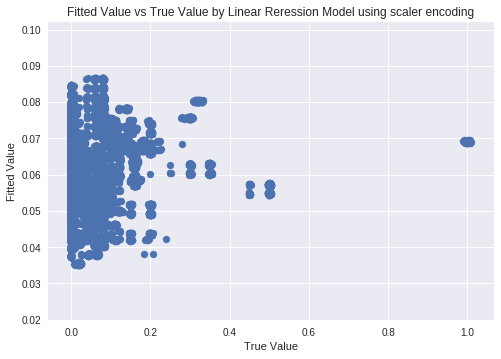

In [0]:
import matplotlib.pyplot as plt
plt.scatter(y_true, y_pred)
plt.xlabel('True Value')
plt.ylabel('Fitted Value')
plt.title('Fitted Value vs True Value by Linear Reression Model using scaler encoding')
plt.show()


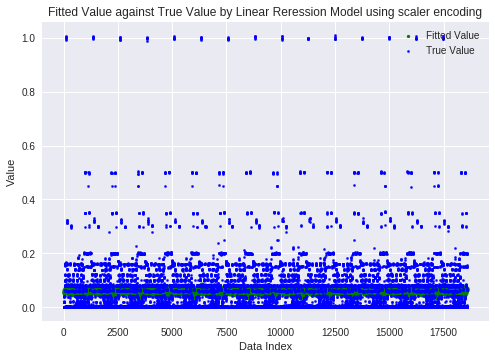

In [0]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_pred)), y_pred,  c='g', marker='x', s=5)
plt.scatter(range(len(y_true)), y_true, c='b', marker='o', s=5)
plt.legend(loc='best', labels=('Fitted Value', 'True Value'))
plt.xlabel('Data Index')
plt.ylabel('Value')
plt.title('Fitted Value against True Value by Linear Reression Model using scaler encoding')
plt.show()

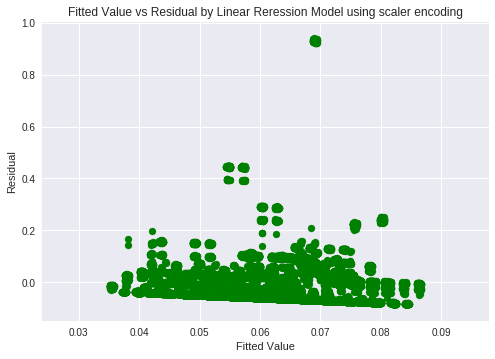

In [0]:
plt.scatter(y_pred, y_true - y_pred, c="g")
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Fitted Value vs Residual by Linear Reression Model using scaler encoding')
plt.show()

#### **(b) Use a random forest regression model for the same task.**

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf = RandomForestRegressor(n_estimators=20,max_depth=4, bootstrap=True, 
                           max_features=5, oob_score=True)
kf = KFold(n_splits=10)

outofbag = np.zeros(10)
rmse_ts = np.zeros(10)
rmse_tr = np.zeros(10)
min_rmse = float("inf")

def rmse(pred, target):
  rmse = np.sqrt(((pred - target) ** 2).mean())
  return rmse



for fold, Index in enumerate(kf.split(X_scaler)):
  train_index, test_index = Index
  Xtr, Xts = X_scaler.loc[train_index], X_scaler.loc[test_index]
  ytr, yts = y.loc[train_index], y.loc[test_index]
  rf.fit(Xtr, ytr)
  pred_tr = rf.predict(Xtr)
  pred_ts = rf.predict(Xts)
  
  rmse_tr[fold] = rmse(pred_tr, ytr)
  rmse_ts[fold] = rmse(pred_ts, yts)
  outofbag[fold] = 1 - rf.oob_score_
  
  if rmse_ts[fold] < min_rmse:
    min_rmse = rmse_ts[fold]
    best_rf = rf
    

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

In [0]:
#plots
y_pred = best_rf.predict(X_scaler)
y_true = y.values

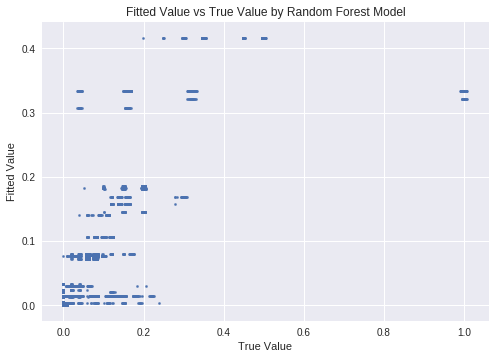

In [0]:
import matplotlib.pyplot as plt
plt.scatter(y_true, y_pred, s=5)
plt.xlabel('True Value')
plt.ylabel('Fitted Value')
plt.title('Fitted Value vs True Value by Random Forest Model')
plt.show()

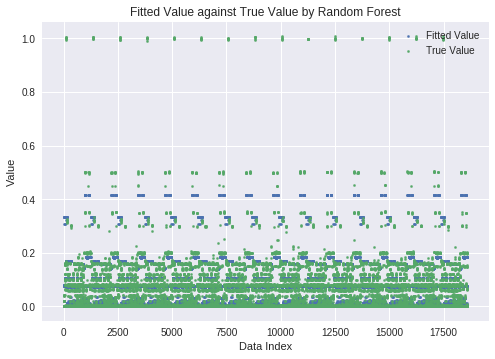

In [0]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_pred)), y_pred, s=5)
plt.scatter(range(len(y_true)), y_true, s=5)
plt.legend(loc='best', labels=('Fitted Value', 'True Value'))
plt.xlabel('Data Index')
plt.ylabel('Value')
plt.title('Fitted Value against True Value by Random Forest')
plt.show()

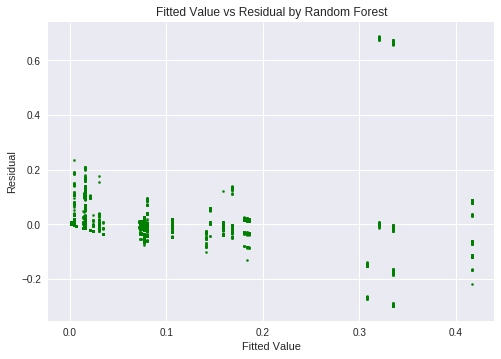

In [0]:
plt.scatter(y_pred, y_true - y_pred, c="g", s=5)
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Fitted Value vs Residual by Random Forest')
plt.show()

**i. Report Training and average Test RMSE from 10 fold cross validation (sum up each fold’s square error, divide by total number of data then take square root) and Out Of Bag error you get from this initial model.**

In [0]:
print('Test RMSE from 10 fold cross validation', rmse_ts)
print('Train RMSE from 10 fold cross validation', rmse_tr)
print('Average Test RMSE from 10 fold cross validation', np.mean(rmse_ts))
print('Average Train RMSE from 10 fold cross validation', np.mean(rmse_tr))
print('Out of Bag Error from 10 fold cross validation', outofbag)
print('Average Out of Bag Error from 10 fold cross validation', np.mean(outofbag))


Test RMSE from 10 fold cross validation [0.06764074 0.05154571 0.06745133 0.053318   0.06652498 0.05391141
 0.06774105 0.05267539 0.06740098 0.0533911 ]
Train RMSE from 10 fold cross validation [0.0601408  0.05960861 0.06013765 0.0616376  0.05937561 0.06088864
 0.06012154 0.06117908 0.06017252 0.0615678 ]
Average Test RMSE from 10 fold cross validation 0.0601600701074104
Average Train RMSE from 10 fold cross validation 0.060482985344622486
Out of Bag Error from 10 fold cross validation [0.33661706 0.32972731 0.33712365 0.349956   0.33030091 0.34151442
 0.33706991 0.34518871 0.3381595  0.34758671]
Average Out of Bag Error from 10 fold cross validation 0.3393244182507348


In [0]:
best_rf.fit(X_scaler.values, y.values)
print('Out of Bag Error by using the best model from kf',1-best_rf.oob_score_)

Out of Bag Error by using the best model from kf 0.33557502985633625


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [0]:
#out of bag error by fitting the entire dataset
rf.fit(X_scaler.values, y.values)
print('Out of Bag Error',1-rf.oob_score_)

Out of Bag Error 0.33840610333779064


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


**ii. Sweep over number of trees from 1 to 200 and maximum number of features from 1 to 5, plot**  


*   out-of-bag error (y axis) against number of trees (x axis)  
*   average test-RMSE (y axis) against number of trees (x axis)


In [0]:
tree = range(1, 201)
feature = range(1, 6)

kf = KFold(n_splits=10)
outofbag = np.zeros((5,200))
rmse_ts = np.zeros((5, 200))
min_rmse = float("inf")

for n_estimators in tree:
  for max_features in feature:
    rmse_10fold = np.zeros(10)
    rf = RandomForestRegressor(n_estimators=n_estimators,max_depth=4, 
                               bootstrap=True, max_features=max_features, 
                               oob_score=True)
    rf.fit(X_scaler.values, y.values)
    outofbag[max_features-1][n_estimators-1] = 1-rf.oob_score_
    for fold, index in enumerate(kf.split(X_scaler)):
      train_index, test_index = index
      Xtr, Xts = X_scaler.loc[train_index], X_scaler.loc[test_index]
      ytr, yts = y.loc[train_index], y.loc[test_index]
      
      rf = RandomForestRegressor(n_estimators=n_estimators,max_depth=4, 
                               bootstrap=True, max_features=max_features, 
                               oob_score=True)
      rf.fit(Xtr, ytr)
      pred_ts = rf.predict(Xts)
      
      rmse_10fold[fold] = rmse(pred_ts, yts)
      
    rmse_ts[max_features-1][n_estimators-1] = np.mean(rmse_10fold)
      
    


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

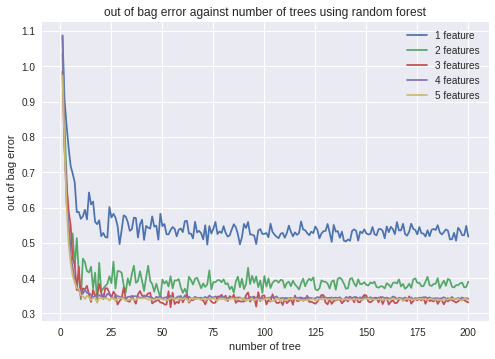

In [0]:
for i in range(5):
  plt.plot(tree, outofbag[i,:])
plt.xlabel('number of tree')
plt.ylabel('out of bag error')
plt.legend(labels=('1 feature', '2 features', '3 features', '4 features', '5 features'))
plt.title('out of bag error against number of trees using random forest')
plt.show()

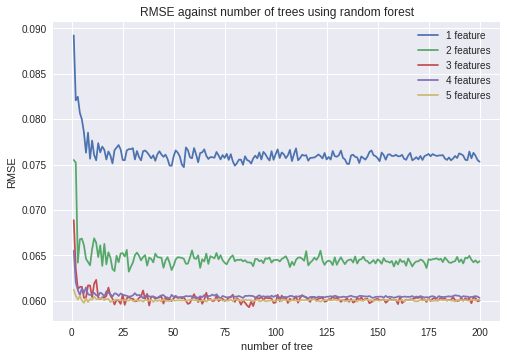

In [0]:
for i in range(5):
  plt.plot(tree, rmse_ts[i,:])
plt.xlabel('number of tree')
plt.ylabel('RMSE')
plt.legend(labels=('1 feature', '2 features', '3 features', '4 features', '5 features'))
plt.title('RMSE against number of trees using random forest')
plt.show()

**iii. Pick another parameter you want to experiment on. Plot similar figure 1 and figure 2 as above. What parameters would you pick to achieve the best performance?
**

In [0]:
tree = range(1, 201)
depth = range(1, 6)


kf = KFold(n_splits=10)
outofbag_depth = np.zeros((5,200))
rmse_ts_depth = np.zeros((5, 200))
min_rmse_depth = float("inf")

for n_estimators in tree:
  for max_depth in depth:
    rmse_10fold = np.zeros(10)
    rf = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth, 
                               bootstrap=True, max_features=5, 
                               oob_score=True)
    rf.fit(X_scaler.values, y.values)
    outofbag_depth[max_depth-1][n_estimators-1] = 1-rf.oob_score_
    
    for fold, index in enumerate(kf.split(X_scaler)):
      train_index, test_index = index
      Xtr, Xts = X_scaler.loc[train_index], X_scaler.loc[test_index]
      ytr, yts = y.loc[train_index], y.loc[test_index]
      
      rf = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth, 
                               bootstrap=True, max_features=5, 
                               oob_score=True)
      rf.fit(Xtr, ytr)
      pred_ts = rf.predict(Xts)
      
      rmse_10fold[fold] = rmse(pred_ts, yts)
      
    rmse_ts_depth[max_depth-1][n_estimators-1] = np.mean(rmse_10fold)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

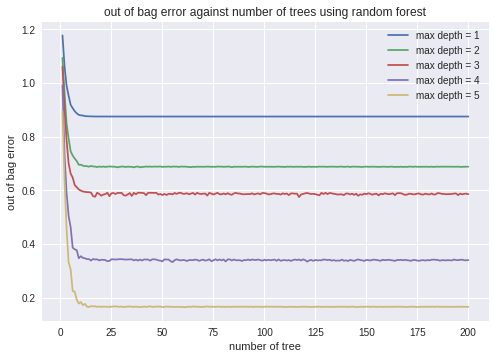

In [0]:
for i in range(5):
  plt.plot(tree, outofbag_depth[i,:])
plt.xlabel('number of tree')
plt.ylabel('out of bag error')
plt.legend(labels=('max depth = 1', 'max depth = 2', 'max depth = 3', 'max depth = 4', 'max depth = 5'))
plt.title('out of bag error against number of trees using random forest')
plt.show()

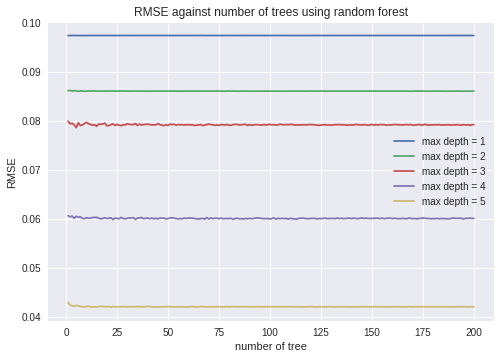

In [0]:
for i in range(5):
  plt.plot(tree, rmse_ts_depth[i,:])
plt.xlabel('number of tree')
plt.ylabel('RMSE')
plt.legend(labels=('max depth = 1', 'max depth = 2', 'max depth = 3', 'max depth = 4', 'max depth = 5'))
plt.title('RMSE against number of trees using random forest')
plt.show()

**iv. Report the feature importances you got from the best random forest regression you find.**

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
#3 features, 25+ trees, depth 5
kf = KFold(n_splits=10)

rmse_best = np.zeros(10)
for fold, index in enumerate(kf.split(X_scaler)):
      train_index, test_index = index
      Xtr, Xts = X_scaler.loc[train_index], X_scaler.loc[test_index]
      ytr, yts = y.loc[train_index], y.loc[test_index]
      
      rf = RandomForestRegressor(n_estimators=25, max_depth=5, 
                               bootstrap=True, max_features=3, 
                               oob_score=True)
      rf.fit(Xtr, ytr)
      pred_ts = rf.predict(Xts)
      
      rmse_best[fold] = rmse(pred_ts, yts)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [0]:
print(rmse_best)

[0.04780202 0.04162093 0.04700139 0.04108657 0.04720282 0.04572146
 0.0494913  0.03833488 0.0500936  0.03976445]


In [0]:
print(np.mean(rmse_best))

0.0448119411140924


In [0]:
print(X_scaler.columns.values)
rf.feature_importances_

['Week #' 'Day of Week' 'Backup Start Time - Hour of Day' 'Work-Flow-ID'
 'File Name']


array([0.00078131, 0.31868635, 0.23028964, 0.1799154 , 0.27032731])

**v. Visualize your decision trees. Pick any tree (estimator) in best random forest (with max depth=4) and plot its structure, which is the root node in this decision tree? Is it the most important feature according to the feature importance reported by the regressor?**

In [0]:
from sklearn.tree import export_graphviz, DecisionTreeRegressor

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [0]:
#all feature one-hot encoded

X_onehot = X.copy()
categorical_columns = ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']
enc = OneHotEncoder(categories='auto')
enc.fit(X_onehot)

preprocess = make_column_transformer(
    (OneHotEncoder(sparse=False), categorical_columns),
    remainder='passthrough'
)

X_onehot = preprocess.fit_transform(X_onehot)

In [0]:
tree = DecisionTreeRegressor(max_depth=4,max_features=3)
tree.fit(X_onehot ,y.values)
export_graphviz(tree,out_file='gdrive/My Drive/tree.dot') 

In [0]:
tree = DecisionTreeRegressor(max_depth=4,max_features=3)
tree.fit(X_scaler ,y.values)
export_graphviz(tree,out_file='gdrive/My Drive/tree1.dot') 

ValueError: ignored

#### **(c) Now use a neural network regression model (one hidden layer) with all features one-hot encoded. Parameters:**  

*  Number of hidden units. Try [2, 5, 10, 50, 100, 150, 200, . . . , 600].
*  Activation function (‘relu’, ‘logistic’, ‘tanh’)

**Plot test-RMSE vs the number of hidden units for each activation function.
Report the best combination.**

In [0]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
import numpy as np

In [0]:
hidden_layer = [2, 5, 10, 50, 100, 150, 200, 
                250, 300, 350, 400, 450, 500, 550, 600]
activation = ('relu','logistic','tanh')
rmse_ts = np.zeros((3, 15))
rmse_tr = np.zeros((3, 15))
min_rmse = float("inf")


kf = KFold(n_splits=10)


def rmse(pred, target):
  rmse = np.sqrt(((pred - target) ** 2).mean())
  return rmse

for i, activation in enumerate(activation):
  for j, layers in enumerate(hidden_layer):
    
    rmse_10tr = np.zeros(10)
    rmse_10ts = np.zeros(10)
    
    for fold, index in enumerate(kf.split(X_onehot)):
      train_index, test_index = index
      Xtr, Xts = X_onehot[train_index], X_onehot[test_index]
      ytr, yts = y.loc[train_index], y.loc[test_index]
      
      mlp = MLPRegressor(hidden_layer_sizes=layers, activation = activation)
      
      mlp.fit(Xtr, ytr)
      pred_ts = mlp.predict(Xts)
      pred_tr = mlp.predict(Xtr)
      
      rmse_10tr[fold] = rmse(pred_tr, ytr)
      rmse_10ts[fold] = rmse(pred_ts, yts)
      
      if rmse_10ts[fold] < min_rmse:
        min_rmse = rmse_10ts[fold]
        best_mlp = mlp  
      
    rmse_ts[i][j] = np.mean(rmse_10ts)
    rmse_tr[i][j] = np.mean(rmse_10tr)

In [0]:
print(rmse_ts)


[[0.13535922 0.08157744 0.07011585 0.03833828 0.03144907 0.03554009
  0.02630444 0.03126395 0.02767673 0.02726537 0.02858979 0.0264829
  0.02789353 0.02423361 0.02640424]
 [0.09127432 0.09118132 0.09082181 0.09187211 0.09288199 0.09062986
  0.09173896 0.09369287 0.09148535 0.0932247  0.0929113  0.09160086
  0.09274727 0.09410862 0.09421681]
 [0.10908557 0.10565868 0.10023602 0.05808106 0.0537363  0.04883209
  0.05265533 0.05550875 0.05150909 0.04305396 0.05573796 0.05363166
  0.05705181 0.04594222 0.05779803]]


In [0]:
print(rmse_tr)

[[0.09630325 0.05662238 0.04486227 0.01849351 0.01649988 0.0157288
  0.01453461 0.01391836 0.01306458 0.0130785  0.01259659 0.01204169
  0.0120707  0.01221741 0.01137639]
 [0.08954402 0.08826114 0.08826893 0.0884945  0.08880116 0.08889117
  0.08927792 0.09096335 0.08956466 0.08956887 0.09051924 0.09007662
  0.09082437 0.09130804 0.09246136]
 [0.08860247 0.08756237 0.08197808 0.03881885 0.03763773 0.03167646
  0.02884183 0.03489568 0.03132709 0.02775407 0.04027087 0.0334895
  0.04118098 0.03694584 0.04811161]]


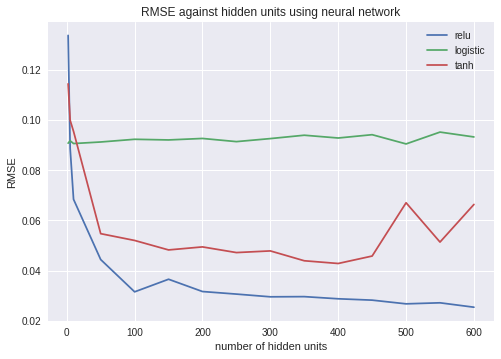

In [0]:
import matplotlib.pyplot as plt

for i in range(3):
  plt.plot(hidden_layer, rmse_ts[i,:])
plt.xlabel('number of hidden units')
plt.ylabel('RMSE')
plt.legend(labels=('relu','logistic','tanh'))
plt.title('RMSE against hidden units using neural network')
plt.show()

In [0]:
y_pred = best_mlp.predict(X_onehot)
y_true = y.values

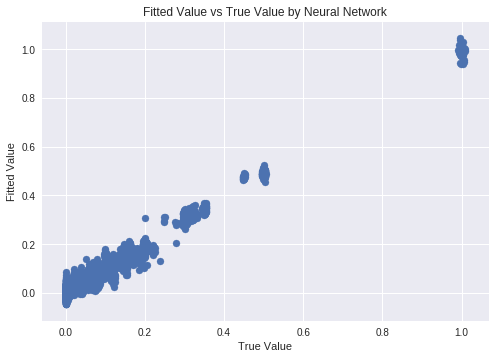

In [0]:
import matplotlib.pyplot as plt
plt.scatter(y_true, y_pred)
plt.xlabel('True Value')
plt.ylabel('Fitted Value')
plt.title('Fitted Value vs True Value by Neural Network')
plt.show()

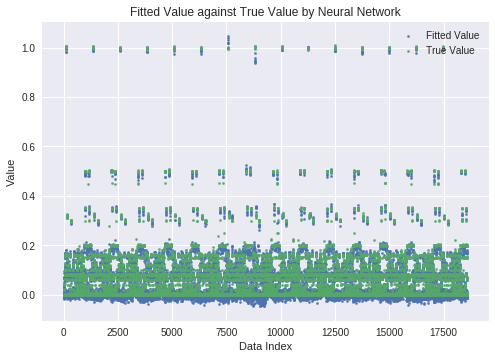

In [0]:
plt.scatter(range(len(y_pred)), y_pred, s=5)
plt.scatter(range(len(y_true)), y_true, s=5)
plt.legend(loc='best', labels=('Fitted Value', 'True Value'))
plt.xlabel('Data Index')
plt.ylabel('Value')
plt.title('Fitted Value against True Value by Neural Network')
plt.show()

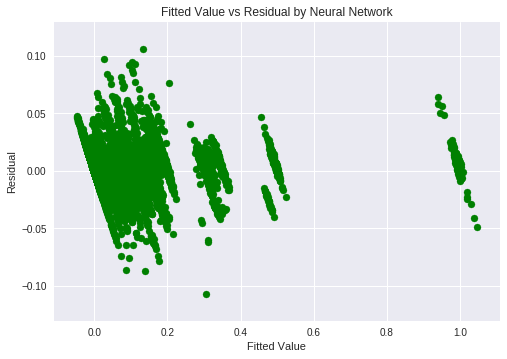

In [0]:
plt.scatter(y_pred, y_true - y_pred, c="g")
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Fitted Value vs Residual by Neural Network')
plt.show()

#### **(d) Predict the Backup size for each of the workflows separately.**

**i. Using linear regression model. Explain if the fit is improved?**

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn import linear_model

In [0]:
scalar_X = nwbu.copy()

In [0]:
scalar_X.columns

Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name', 'Size of Backup (GB)',
       'Backup Time (hour)'],
      dtype='object')

In [0]:
day_numeric = {
    'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4,
    'Friday':5, 'Saturday':6, 'Sunday':7
}

scalar_X['Day of Week'] = scalar_X['Day of Week'].apply(lambda x: day_numeric[x])

In [0]:
wfid_numeric={
    'work_flow_0':0,
    'work_flow_1':1,
    'work_flow_2':2,
    'work_flow_3':3,
    'work_flow_4':4
}
scalar_X['Work-Flow-ID'] = scalar_X['Work-Flow-ID'].apply(lambda x: wfid_numeric[x])

In [0]:
fn_numeric={
    'File_0':1, 'File_1':2, 'File_2':3, 'File_3':4, 'File_4':5, 'File_5':6,
    'File_6':7, 'File_7':8, 'File_8':9, 'File_9':10, 'File_10':11,
    'File_11':12, 'File_12':13, 'File_13':14, 'File_14':15, 'File_15':16,
    'File_16':17, 'File_17':18, 'File_18':19, 'File_19':20, 'File_20':21,
    'File_21':22, 'File_22':23, 'File_23':24, 'File_24':25, 'File_25':26,
    'File_26':27, 'File_27':28, 'File_28':29, 'File_29':30
}
scalar_X['File Name'] = scalar_X['File Name'].apply(lambda x: fn_numeric[x])

Work Flow ID =  0
training RMSE =  [0.03570555 0.03594719 0.03572458 0.03570646 0.03577678 0.03602217
 0.03566539 0.03602294 0.03575094 0.03603034]
test RMSE =  [0.03705092 0.03486967 0.03687099 0.0370181  0.03640268 0.03417222
 0.03737511 0.03415557 0.03663592 0.0340835 ]
average test RMSE =  0.03586346655296642


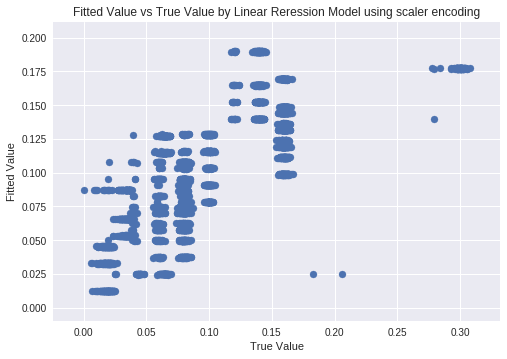

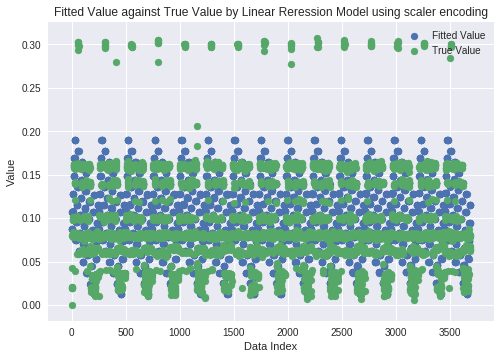

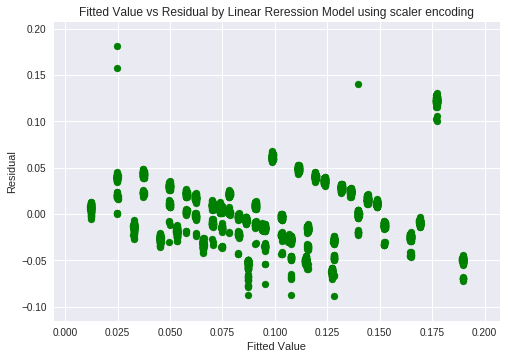

Work Flow ID =  1
training RMSE =  [0.1461789  0.15130557 0.14620991 0.1513097  0.14621229 0.15126452
 0.14618282 0.15130344 0.14617777 0.15129651]
test RMSE =  [0.17043391 0.12379992 0.17017383 0.12371056 0.17014842 0.1242011
 0.17038135 0.12378352 0.17043517 0.12390809]
average test RMSE =  0.14709758822040112


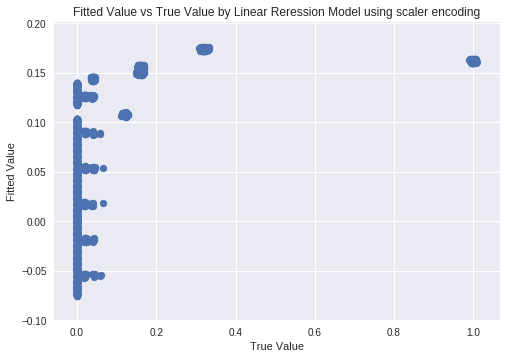

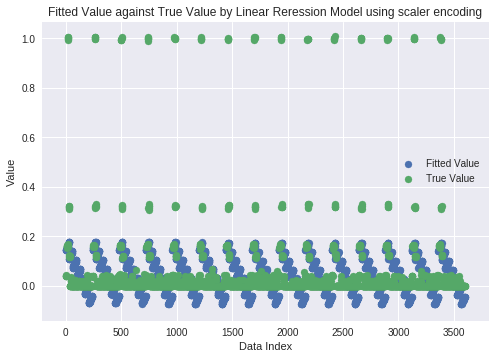

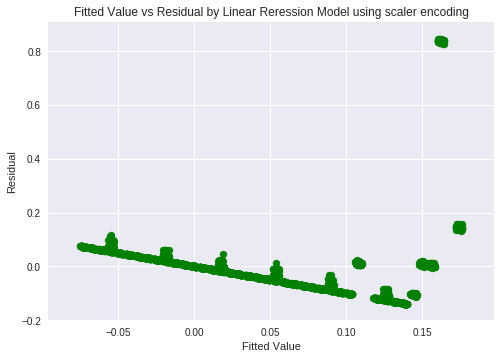

Work Flow ID =  2
training RMSE =  [0.04358677 0.04227512 0.04366026 0.04249173 0.04365586 0.04168399
 0.04340159 0.04236531 0.04368263 0.04222868]
test RMSE =  [0.0364608  0.0483814  0.03560204 0.04659827 0.03563556 0.05279302
 0.03835048 0.04764129 0.03548782 0.04880264]
average test RMSE =  0.04257533084504969


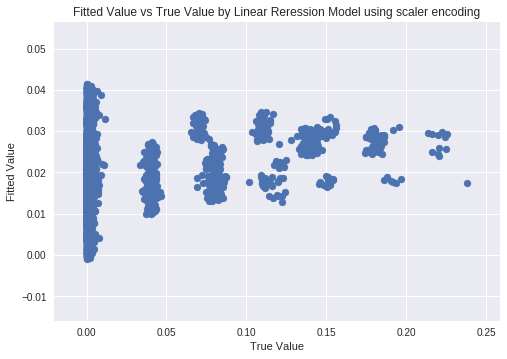

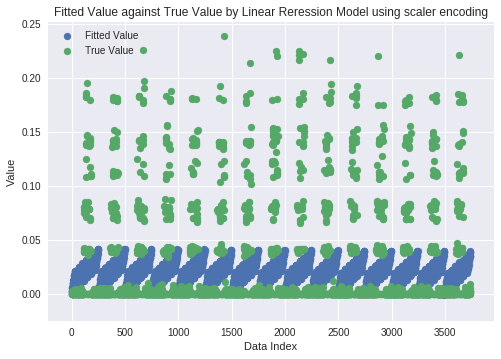

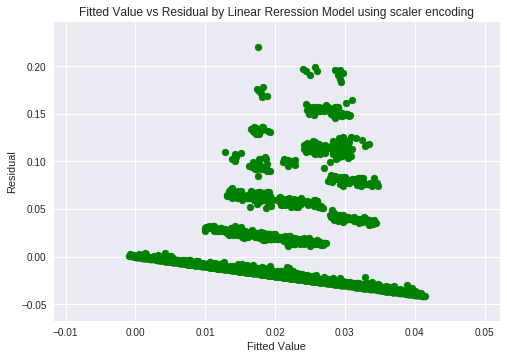

Work Flow ID =  3
training RMSE =  [0.00736828 0.00717788 0.00733687 0.00713597 0.00739935 0.00711621
 0.00731219 0.00708244 0.00734669 0.00715395]
test RMSE =  [0.00604342 0.00783062 0.0063608  0.00816303 0.00567624 0.00831707
 0.00660988 0.00857479 0.00626729 0.0080237 ]
average test RMSE =  0.007186683488524773


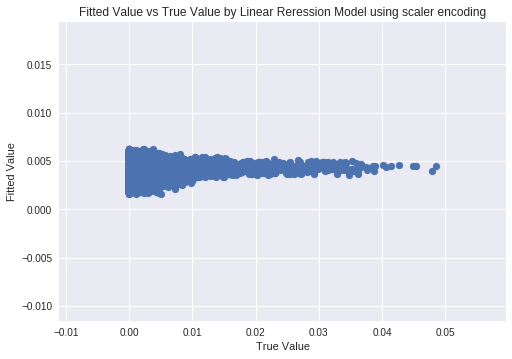

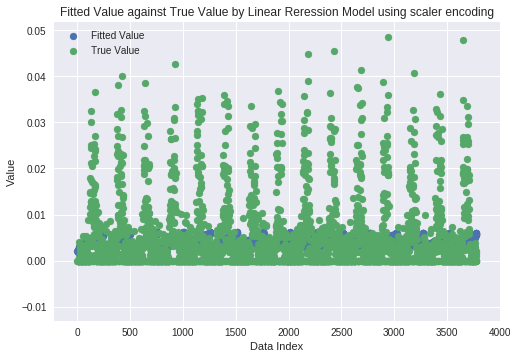

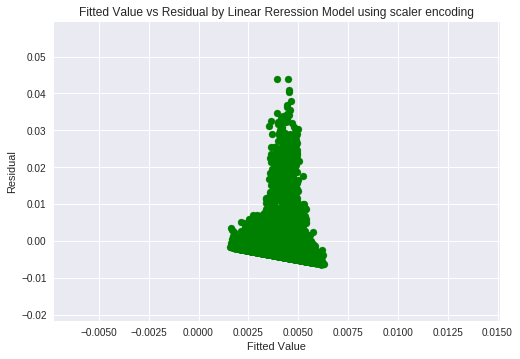

Work Flow ID =  4
training RMSE =  [0.0871622  0.0847293  0.08710513 0.08459278 0.08701006 0.0849066
 0.08704317 0.08475621 0.08706553 0.08476929]
test RMSE =  [0.07390365 0.09604574 0.0745144  0.097119   0.07550607 0.094634
 0.0751583  0.09584044 0.07492722 0.09574873]
average test RMSE =  0.08533975477118065


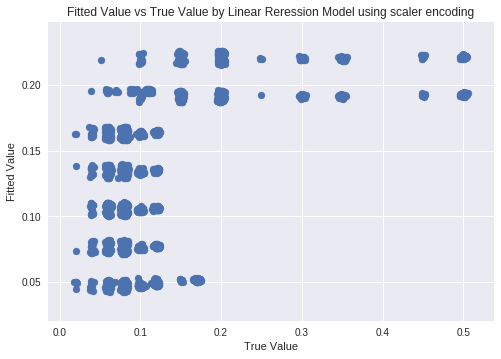

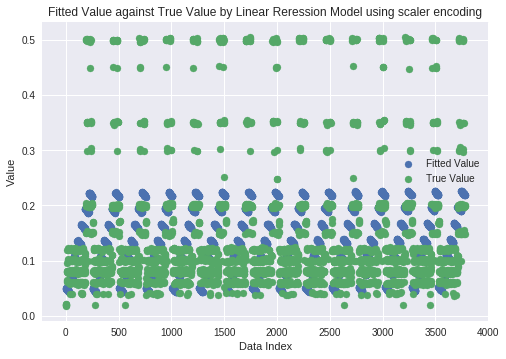

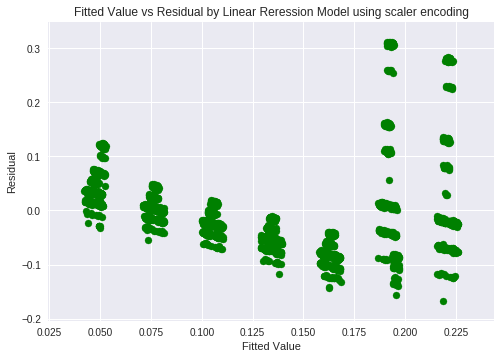

In [0]:
import matplotlib.pyplot as plt


def rmse(pred, target):
  rmse = np.sqrt(((pred - target) ** 2).mean())
  return rmse

reg = linear_model.LinearRegression()
kf = KFold(n_splits=10)

for i in range(len(set(scalar_X['Work-Flow-ID']))):
  subset = scalar_X[scalar_X['Work-Flow-ID']==i]
  X_scalar = subset[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name']]
  y = subset[['Size of Backup (GB)']]
  

  
  rmse_ts = np.zeros(10)
  rmse_tr = np.zeros(10)
  min_rmse = float('inf')
  
  for fold, Index in enumerate(kf.split(X_scalar)):
    train_index, test_index = Index
    Xtr, Xts = X_scalar.iloc[train_index], X_scalar.iloc[test_index]
    ytr, yts = y.iloc[train_index], y.iloc[test_index]
    
    reg.fit(Xtr, ytr)
    pred_tr = reg.predict(Xtr)
    pred_ts = reg.predict(Xts)
    
    rmse_tr[fold] = rmse(pred_tr, ytr)
    rmse_ts[fold] = rmse(pred_ts, yts)
    
    
    if rmse_ts[fold] < min_rmse:
      min_rmse = rmse_ts[fold]
      best_reg = reg
      
  print('Work Flow ID = ', i)

  print('training RMSE = ', rmse_tr)
  print('test RMSE = ', rmse_ts)
  print('average test RMSE = ', np.mean(rmse_ts))
  
  y_pred = best_reg.predict(X_scalar)
  y_true = y.values
  
  plt.scatter(y_true, y_pred)
  plt.xlabel('True Value')
  plt.ylabel('Fitted Value')
  plt.title('Fitted Value vs True Value by Linear Reression Model using scaler encoding')
  plt.show()
  
  plt.scatter(range(len(y_pred)), y_pred)
  plt.scatter(range(len(y_true)), y_true)
  plt.legend(loc='best', labels=('Fitted Value', 'True Value'))
  plt.xlabel('Data Index')
  plt.ylabel('Value')
  plt.title('Fitted Value against True Value by Linear Reression Model using scaler encoding')
  plt.show()
  
  plt.scatter(y_pred, y_true - y_pred, c="g")
  plt.xlabel('Fitted Value')
  plt.ylabel('Residual')
  plt.title('Fitted Value vs Residual by Linear Reression Model using scaler encoding')
  plt.show()


**ii. Try fitting a more complex regression function to your data. You can try a polynomial function of your variables. Try increasing the degree of the polynomial to improve your fit. Again, use a 10 fold cross validation to evaluate your results. Plot the average train and test RMSE of the trained model against the degree of the polynomial you use. Can you find a threshold on the degree of the fitted polynomial beyond which the generalization error of your model gets worse? Can you explain how cross validation helps controlling the complexity of your model?**

In [0]:
from sklearn.preprocessing import PolynomialFeatures

Work Flow ID =  0


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


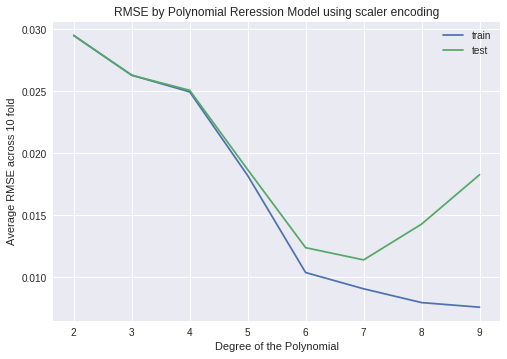

Work Flow ID =  1


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


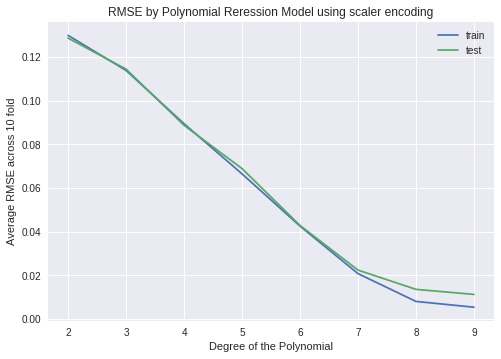

Work Flow ID =  2


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


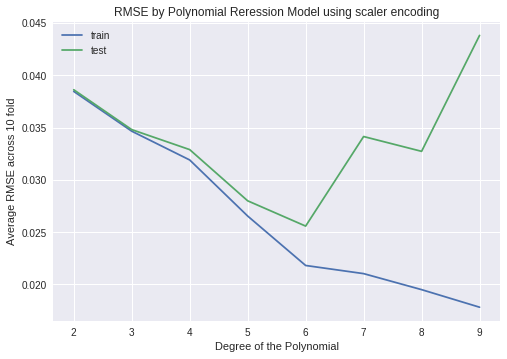

Work Flow ID =  3


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


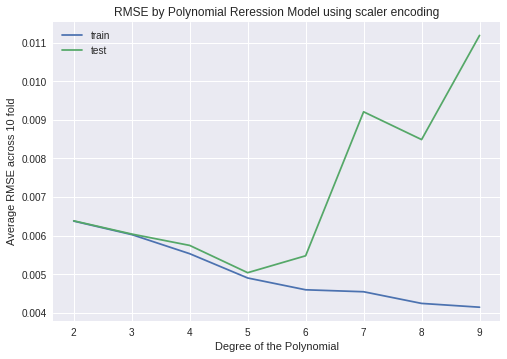

Work Flow ID =  4


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


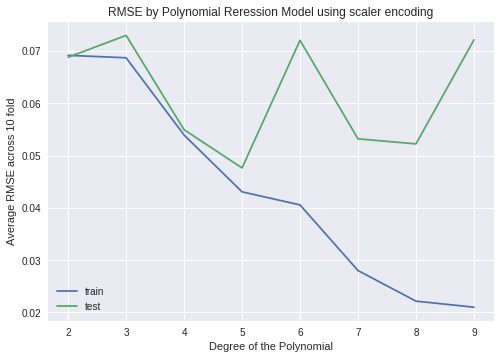

In [0]:
import matplotlib.pyplot as plt


def rmse(pred, target):
  rmse = np.sqrt(((pred - target) ** 2).mean())
  return rmse

reg = linear_model.LinearRegression()
kf = KFold(n_splits=10)


for i in range(len(set(scalar_X['Work-Flow-ID']))):
  subset = scalar_X[scalar_X['Work-Flow-ID']==i]
  X_scalar = subset[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name']]
  y = subset[['Size of Backup (GB)']]
  
  rmse_train = []
  rmse_test = []
  
  
  for degree in range(2,10):
    poly_reg = PolynomialFeatures(degree = degree)
    X_poly = poly_reg.fit_transform(X_scalar)
    rmse_ts = np.zeros(10)
    rmse_tr = np.zeros(10)
    
    for fold, Index in enumerate(kf.split(X_poly)):
      train_index, test_index = Index
      Xtr, Xts = X_poly[train_index], X_poly[test_index]
      ytr, yts = y.iloc[train_index], y.iloc[test_index]

      reg.fit(Xtr, ytr)
      pred_tr = reg.predict(Xtr)
      pred_ts = reg.predict(Xts)

      rmse_tr[fold] = rmse(pred_tr, ytr)
      rmse_ts[fold] = rmse(pred_ts, yts)
    
    avgrmse_tr = np.mean(rmse_tr)
    avgrmse_ts = np.mean(rmse_ts)
    
    rmse_train = np.append(rmse_train, avgrmse_tr)
    rmse_test = np.append(rmse_test, avgrmse_ts)


  print('Work Flow ID = ', i)
  plt.plot(range(2,10), rmse_train)
  plt.plot(range(2,10), rmse_test)
  plt.legend('upper left', labels=('train', 'test'))
  plt.xlabel('Degree of the Polynomial')
  plt.ylabel('Average RMSE across 10 fold')
  plt.title('RMSE by Polynomial Reression Model using scaler encoding')
  plt.show()

#### **(e) Use k-nearest neighbor regression and find the best parameter.**

In [0]:
from sklearn.neighbors import KNeighborsRegressor

training RMSE =  [0.04802348 0.0493244  0.05090832 0.04951839 0.049126   0.0496706
 0.04746977 0.04880223 0.04899268 0.05036364]
test RMSE =  [0.05204473 0.04163145 0.04804277 0.04227428 0.05021003 0.03153024
 0.04866849 0.04175481 0.04655687 0.01442106]
average test RMSE =  0.04171347292456655


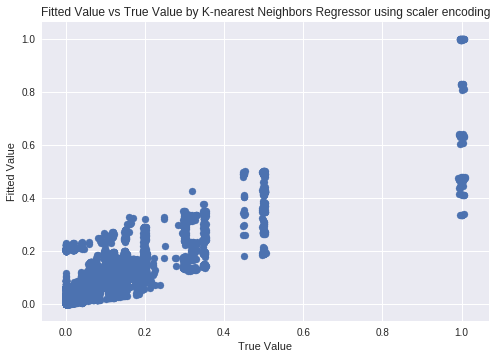

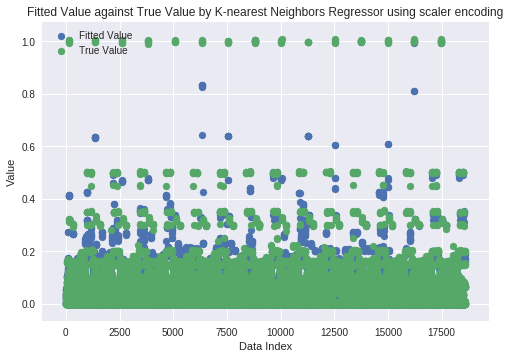

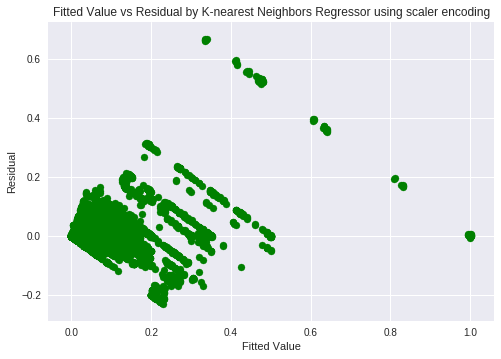

In [0]:
def rmse(pred, target):
  rmse = np.sqrt(((pred - target) ** 2).mean())
  return rmse

KNN = KNeighborsRegressor()
kf = KFold(n_splits=10)


rmse_ts = np.zeros(10)
rmse_tr = np.zeros(10)
min_rmse = float('inf')

for fold, Index in enumerate(kf.split(X_onehot)):
  train_index, test_index = Index
  Xtr, Xts = X_onehot[train_index], X_onehot[test_index]
  ytr, yts = y.loc[train_index], y.loc[test_index]

  KNN.fit(Xtr, ytr)
  pred_tr = KNN.predict(Xtr)
  pred_ts = KNN.predict(Xts)

  rmse_tr[fold] = rmse(pred_tr, ytr)
  rmse_ts[fold] = rmse(pred_ts, yts)


  if rmse_ts[fold] < min_rmse:
    min_rmse = rmse_ts[fold]
    best_KNN = KNN

print('training RMSE = ', rmse_tr)
print('test RMSE = ', rmse_ts)
print('average test RMSE = ', np.mean(rmse_ts))

y_pred = best_KNN.predict(X_onehot)
y_true = y.values

plt.scatter(y_true, y_pred)
plt.xlabel('True Value')
plt.ylabel('Fitted Value')
plt.title('Fitted Value vs True Value by K-nearest Neighbors Regressor using scaler encoding')
plt.show()

plt.scatter(range(len(y_pred)), y_pred)
plt.scatter(range(len(y_true)), y_true)
plt.legend(loc='best', labels=('Fitted Value', 'True Value'))
plt.xlabel('Data Index')
plt.ylabel('Value')
plt.title('Fitted Value against True Value by K-nearest Neighbors Regressor using scaler encoding')
plt.show()

plt.scatter(y_pred, y_true - y_pred, c="g")
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Fitted Value vs Residual by K-nearest Neighbors Regressor using scaler encoding')
plt.show()

In [0]:
knn = [3, 5, 10]
n_knn = 3

def rmse(pred, target):
  rmse = np.sqrt(((pred - target) ** 2).mean())
  return rmse

rmse_ts = np.zeros((n_knn, 10))
rmse_tr = np.zeros((n_knn, 10))
min_rmse = float('inf')

for k, knn in enumerate(knn):
  for fold, Index in enumerate(kf.split(X_onehot)):
    train_index, test_index = Index
    Xtr, Xts = X_onehot[train_index], X_onehot[test_index]
    ytr, yts = y.loc[train_index], y.loc[test_index]

    KNN.fit(Xtr, ytr)
    pred_tr = KNN.predict(Xtr)
    pred_ts = KNN.predict(Xts)

    rmse_tr[k][fold] = rmse(pred_tr, ytr)
    rmse_ts[k][fold] = rmse(pred_ts, yts)


    if rmse_ts[k][fold] < min_rmse:
      min_rmse = rmse_ts[k][fold]
      best_KNN = KNN
      best_k = knn

print('min test RMSE = ', min_rmse)
print('best numbers of neighbors', best_k)



min test RMSE =  0.014421062366404225
best numbers of neighbors 3


In [0]:
y_bestKNN = best_KNN.predict(X_onehot)
rmse_bestKNN = rmse(y_bestKNN, y.values)
print('Using KNN regressor with ', best_k, 'neighbors, we got the RMSE =', rmse_bestKNN)

Using KNN regressor with  3 neighbors, we got the RMSE = 0.04799732827665599


### Comparison

**Compare these regression models you have used and write some comments, such as which model is best at handling categorical features, which model is good at handling sparse features or not? Which model overall generates the best results?**